# Part 2 - House prices #

> Data set assembled and published by Dean De Cock. 2,930 observations with **82 attributes** each. 
--> The goal is to use the first **2,430 ones to fit** and evaluate different models and use them to make **predictions for the last 500 ones**. Note that we don't provide the prices for those 500 houses, your task is to estimate them.

<i>Source: the code provided below has been written by myself based on my own computational understanding and inspired by code and literature taught during the course curriculum</i>

### A quick look at the data ###
> import the data contained in the house-prices.csv file

In [1]:
import pandas as pd

data_df = pd.read_csv('house-prices.csv')
data_df.shape # (2430, 82)
data_df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


### Data cleaning ###
> 1. Find and handle incorrect, missing values
2. Correct inconsistencies in the variables
3. Handle outliers


> Remove **Order** and **Pid** columns that are identifiers and not useful to predict house prices

In [2]:
# work on a copy
df_new = data_df.copy() # 2430 entries & 82 columns
# remove columns Order & PID
df_new = df_new.drop(columns = ['Order', 'PID'])

df_new.info() # 2430 entires & 80 columns

#--> we can keep the other columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 80 columns):
MS SubClass        2430 non-null int64
MS Zoning          2430 non-null object
Lot Frontage       2010 non-null float64
Lot Area           2430 non-null int64
Street             2430 non-null object
Alley              163 non-null object
Lot Shape          2430 non-null object
Land Contour       2430 non-null object
Utilities          2430 non-null object
Lot Config         2430 non-null object
Land Slope         2430 non-null object
Neighborhood       2430 non-null object
Condition 1        2430 non-null object
Condition 2        2430 non-null object
Bldg Type          2430 non-null object
House Style        2430 non-null object
Overall Qual       2430 non-null int64
Overall Cond       2430 non-null int64
Year Built         2430 non-null int64
Year Remod/Add     2430 non-null int64
Roof Style         2430 non-null object
Roof Matl          2430 non-null object
Exterior 1st       

> **A**. Screen and check for **inconsistencies (1)**: 
1. Nominal data should be object
2. Ordinal data should be object
3. Continuous data should be either int64 or float64
4. Discrete data should be int64

--> based on a manual screen, the data type of following columns need to be modified (inconsistent with the documentation)
1. **MS SubClass** (Nominal) from int64 to object
2. **Overall Qual** (Ordinal) from int64 to object
3. **Overall Cond** (Ordinal) from int64 to object
4. **Bsmt Full Bath** (Discrete) from float64 to int64 (fill 2 missing values with 0)
5. **Bsmt Half Bath** (Discrete) from float64 to int64 (fill 2 missing values with 0)
6. **Garage Yr Blt** (Discrete) from float64 to int64 (fill 138 missing values (5.6%) with mean)
7. **Garage Cars** (Discrete) from float64 to int64 (fill one missing value with 0)



In [3]:
df_new.info() # 2430 entries & 80 columns
#screen for int64 columns and compare it with the documentation
df_new.select_dtypes(include='int64').info()
#screen for float columns and compare it with the documentation
df_new.select_dtypes(include='float64').info()
#screen for object columns and compare it with the documentation
df_new.select_dtypes(include='object').info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 80 columns):
MS SubClass        2430 non-null int64
MS Zoning          2430 non-null object
Lot Frontage       2010 non-null float64
Lot Area           2430 non-null int64
Street             2430 non-null object
Alley              163 non-null object
Lot Shape          2430 non-null object
Land Contour       2430 non-null object
Utilities          2430 non-null object
Lot Config         2430 non-null object
Land Slope         2430 non-null object
Neighborhood       2430 non-null object
Condition 1        2430 non-null object
Condition 2        2430 non-null object
Bldg Type          2430 non-null object
House Style        2430 non-null object
Overall Qual       2430 non-null int64
Overall Cond       2430 non-null int64
Year Built         2430 non-null int64
Year Remod/Add     2430 non-null int64
Roof Style         2430 non-null object
Roof Matl          2430 non-null object
Exterior 1st       

In [4]:
# apply modifications on mentioned columns
df_new['MS SubClass'] = df_new['MS SubClass'].astype('object', copy=False) #1
df_new['Overall Qual'] = df_new['Overall Qual'].astype('object', copy= False) #2
df_new['Overall Cond'] = df_new['Overall Cond'].astype('object', copy= False) #3

# Bsmt Full Bath and Bsmt Full Bath have both 2 nan values --> fill nan with 0
df_new['Bsmt Full Bath'] = df_new['Bsmt Full Bath'].fillna(0)
df_new['Bsmt Full Bath'] = df_new['Bsmt Full Bath'].astype('int64', copy= False) #4

df_new['Bsmt Half Bath'] = df_new['Bsmt Half Bath'].fillna(0)
df_new['Bsmt Half Bath'] = df_new['Bsmt Half Bath'].astype('int64', copy= False) #5

#on 2430 entries, 2292 are non-null, i.e. 138 are nan --> to be replaced with 0, to keep in mind for a later stage
df_new['Garage Yr Blt'] = df_new['Garage Yr Blt'].fillna(0)
df_new['Garage Yr Blt'] = df_new['Garage Yr Blt'].astype('int64', copy= False) #6

#--> one outliner is popping up 2207! to be removed later as it does not make sense.

#fill nan with 0 (only 1 value in the column)
df_new['Garage Cars'] = df_new['Garage Cars'].fillna(0)
df_new['Garage Cars'] = df_new['Garage Cars'].astype('int64', copy = False) #7
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 80 columns):
MS SubClass        2430 non-null object
MS Zoning          2430 non-null object
Lot Frontage       2010 non-null float64
Lot Area           2430 non-null int64
Street             2430 non-null object
Alley              163 non-null object
Lot Shape          2430 non-null object
Land Contour       2430 non-null object
Utilities          2430 non-null object
Lot Config         2430 non-null object
Land Slope         2430 non-null object
Neighborhood       2430 non-null object
Condition 1        2430 non-null object
Condition 2        2430 non-null object
Bldg Type          2430 non-null object
House Style        2430 non-null object
Overall Qual       2430 non-null object
Overall Cond       2430 non-null object
Year Built         2430 non-null int64
Year Remod/Add     2430 non-null int64
Roof Style         2430 non-null object
Roof Matl          2430 non-null object
Exterior 1st    

> **B**. Screen and check for **inconsistencies (2)**: 

--> loop for data mispelled, small errors, replace value and make sure data are consistent (Garage and Basement a.o.)

In [5]:
# Define list for our variables

df_new.select_dtypes('float64').columns
df_new.select_dtypes('int64').columns
df_new.select_dtypes('object').columns

nominal =['MS SubClass', 'MS Zoning', 'Street', 'Alley','Land Contour', 'Lot Config', 'Neighborhood','Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
          'Roof Style', 'Roof Matl','Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type','Foundation','Heating', 'Central Air', 'Garage Type', 
          'Misc Feature','Sale Type', 'Sale Condition']

ordinal = ['Lot Shape','Utilities', 'Land Slope','Overall Qual', 'Overall Cond','Exter Qual','Exter Cond','Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure','BsmtFin Type 1', 
           'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Kitchen Qual','Functional','Fireplace Qu', 'Garage Finish','Garage Qual', 'Garage Cond', 'Paved Drive',
           'Pool QC', 'Fence']

discrete = ['Year Built','Year Remod/Add','Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd','Fireplaces',
            'Garage Yr Blt','Garage Cars','Mo Sold', 'Yr Sold']

continuous = ['Lot Area', '1st Flr SF', '2nd Flr SF','Low Qual Fin SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch','Screen Porch',
              'Pool Area','Misc Val', 'Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF', 'Total Bsmt SF', 'Garage Area' ,'SalePrice' ]

# check for inconsistencies in data

check_nominal = []

for c in nominal:
    check_nominal.append({
        c: df_new[c].unique()
    })


check_nominal

# manually check for inconsistencies with the documention and correct them

#MS SubClass: ok
#MS Zoning: array(['RL', 'RM', 'FV', 'I (all)', 'C (all)', 'RH', 'A (agr)'], remove(all) and (agr)
df_new['MS Zoning']= df_new['MS Zoning'].replace('I (all)', 'I')
df_new['MS Zoning']= df_new['MS Zoning'].replace('C (all)', 'C')
df_new['MS Zoning']= df_new['MS Zoning'].replace('A (agr)', 'A')

#Street: ok
#Alley: ok
#Land Contour: ok
#Lot Config: ok
#Neighborhood: ok
#Condition 1: ok
#Condition 2: ok
#Bldg Type: TwnhsI instead of Twnhs
df_new['Bldg Type'] = df_new['Bldg Type'].replace('Twnhs','TwnhsI')
#House Style: ok
#Roof Style: ok
#Roof Matl: ok
#Exterior 1st: ok
#Exterior 2: ok
# Mas Vnr Type:ok
# Foundation: ok
# Heating: ok
# Central Air: ok
# Garage Type: ok
# Misc Feature: ok
# Sale Type: ok
# Sale condition:ok

check_ordinal = []

for c in ordinal:
    check_ordinal.append({
        c: df_new[c].unique()
    })
check_ordinal

# Lot Shape : ok
# Utilities: ok
# Land Slope: ok
# Overall Qual: ok
# Overall Cond: ok
# Exter Qual: ok
# Exter Cond : ok
# Bsmt Qual: nan, possible for a house without basement
df_new['Bsmt Qual'].isnull().sum() # 71
# Bsmt Cond: same here
df_new['Bsmt Cond'].isnull().sum() # 71
# Bsmt Exposure: 
df_new['Bsmt Exposure'].isnull().sum() # 74
# BsmtFin Type 1:
df_new['BsmtFin Type 1'].isnull().sum() # 71
# BsmtFin Type 2:
df_new['BsmtFin Type 2'].isnull().sum() # 72
# Heating QC: ok
# Electrical: must have a value, not nan, we remove the entire line
df_new['Electrical'].isnull().sum() # 1, observation 694
df_new.drop([694], inplace=True)
# Kitchen Qual: ok
# Functional: ok
# Fireplace Qu: ok
#Garage Finish: nan possible
df_new['Garage Finish'].isnull().sum() # 138
# Garage Qual: ok
df_new['Garage Qual'].isnull().sum() # 138
# Garage Cond: ok
df_new['Garage Cond'].isnull().sum() # 138
#Paved Drive: ok
# Pool QC: ok 
# Fence: ok



check_discrete = []

for c in discrete:
    check_discrete.append({
        c: df_new[c].unique()
    })
check_discrete

# all discrete columns contain consistent data

check_continuous = []

for c in continuous:
    check_continuous.append({
        c: df_new[c].unique()
    })
check_continuous

#Lot Area: ok
#1st Flr SF: ok
#2nd Flr SF: ok
# Low Qual Fin SF: ok
# Gr Liv Area: ok
# Wood Deck SF: ok
#Open Porch SF: ok
#Enclosed Porch: ok
#3Ssn Porch: ok
#Screen Porch:ok
# Pool Area: ok
# Misc Val:ok
# Lot Frontage: nan values, feasible but replace NAN with the average
df_new['Lot Frontage'].isnull().sum() # 420
df_new['Lot Frontage'] = df_new['Lot Frontage'].fillna(round(df_new['Lot Frontage'].mean()))

# Mas Vnr Area: nan values, can be if Mas Vnr Typ = None, replace with 0
df_new['Mas Vnr Area'].isnull().sum() # 20
df_new[['Mas Vnr Area', 'Mas Vnr Type']].sort_values('Mas Vnr Type')
df_new['Mas Vnr Area'] = df_new['Mas Vnr Area'].fillna(0)

# BsmtFin SF 1: nan values, possible if BsmtFin type 1 = nan
df_new['BsmtFin SF 1'].isnull().sum() # 1

# BsmtFin SF 2: nan values
df_new['BsmtFin SF 2'].isnull().sum() # 1

# Bsmt Unf SF: ok
# Total Bsmt SF: ok
# Garage Area: ok
# Sales price:ok

#--> Basement and Garage ,  Pool, Fireplaces have interelated variables, it needs to be consistent

# Consistency Fireplace:
df_new['Fireplaces'].value_counts() # 1186 have zero
df_new['Fireplace Qu'].isnull().sum() # 1186 have no Fireplace
#--> ok

#Consistency Pool
df_new['Pool Area'].value_counts() # 2418 have no pool
df_new['Pool QC'].isnull().sum() # 2418 have no pool
# --> ok


# Consistency Basement: if no Basement, Bsmt Cond, exposure, Type 1, SF1, Type2, SF2, UNf sf and Total bsmt sf, bsmt full bath and half bath = 0

#for consistency we replace NaN in Bsmt Exposure with No (No exposure)
df_new['Bsmt Exposure'].loc[(df_new['Bsmt Exposure'].isna())&(df_new['Bsmt Qual'].notna())] = 'No'

#for consistency, replace 'BsmtFin Type 2' nan with the most used one 'unf' 
df_new['BsmtFin Type 2'].loc[(df_new['BsmtFin Type 2'].isna())&(df_new['Bsmt Qual'].notna())] = 'unf'

#for consistency, replace BsmtFin SF1 and SF2 Nan with 0 (only 1 value)
df_new.loc[df_new['BsmtFin SF 2'].isna()]= 0
df_new.loc[df_new['BsmtFin SF 2'].isna()] =0
#--> ok

# Consistency Garage:
# Type (Nominal, accept NA),
# Yr Blt (Discrete), 
# Finish (Ordinal, accept NA), 
# Cars (Discrete), 
# Area (Continuous), 
# Qual (Ordinal, accept NA)
# Cond (Ordinal, accept NA)

df_new[['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']].loc[df_new['Garage Area'].isna()]
# remove row (1565) as too much data will have to be guessed.
df_new.drop([1565], inplace=True)

df_new[['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']].loc[(df_new['Garage Finish'].isna() & (df_new['Garage Type'].notna()))]
# remove line (1114) as too many variable have to be guessed
df_new.drop([1114], inplace = True)
#--> ok



C:\Users\fabvi\Documents\Formation\EPFL\Python\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


> **C**. Check and handle **outliners**: 

1. Plot discrete against Saleprice and remove manually (Outliners 1 below)
2. Plot continuous against Saleprice and remove manually (Outliners 2 below)

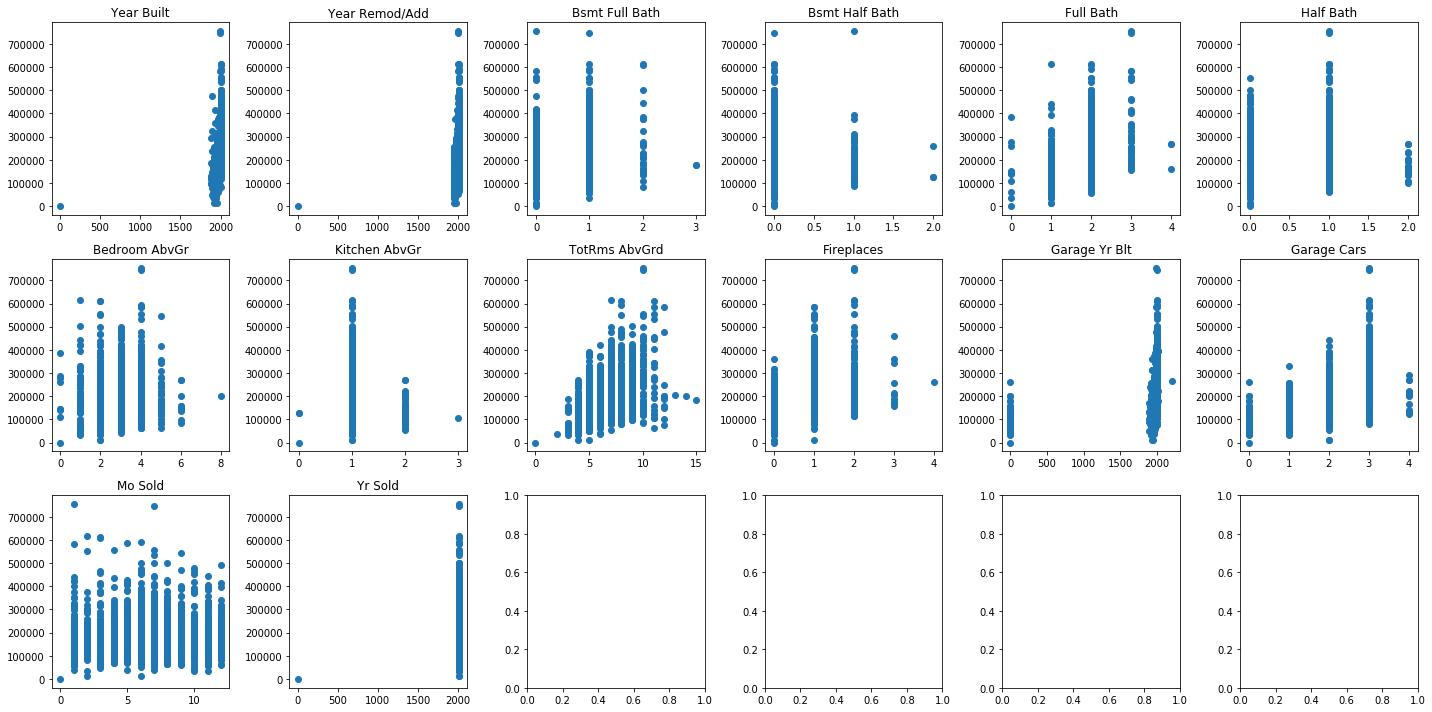

In [6]:
# Plot discrete against SalePrice (14 variables)

import matplotlib.pyplot as plt
%matplotlib inline

fig,axes = plt.subplots(nrows=3, ncols=6, figsize =(20,10))

for c, ax in zip (discrete,axes.ravel()):
    ax.scatter(df_new[c], df_new['SalePrice'])
    ax.set_title(c)

plt.tight_layout() # to avoid overlapping with the labels
plt.show()

In [7]:
### OUTLINERS 1 ###
## Manual removal

# some data shows 0 Yr Sold, check and remove

df_new.loc[(df_new['Yr Sold']==0)] #104
df_new.drop([104], inplace=True)

# remove data points Yr Built > 1970 and sale price > 700'000 / Yr Built < 1900 and sale price > 400'000

df_new.loc[((df_new['Year Built']>1970)&(df_new['SalePrice']>700000))] #102, 237
df_new.drop([102,237], inplace = True)
df_new.loc[((df_new['Year Built']<1900)&(df_new['SalePrice']>400000))] # 647
df_new.drop([647], inplace = True)

# remove Garage Yr Blt > 2020

df_new.loc[(df_new['Garage Yr Blt']>2020)] # 2219
df_new.drop([2219], inplace = True)


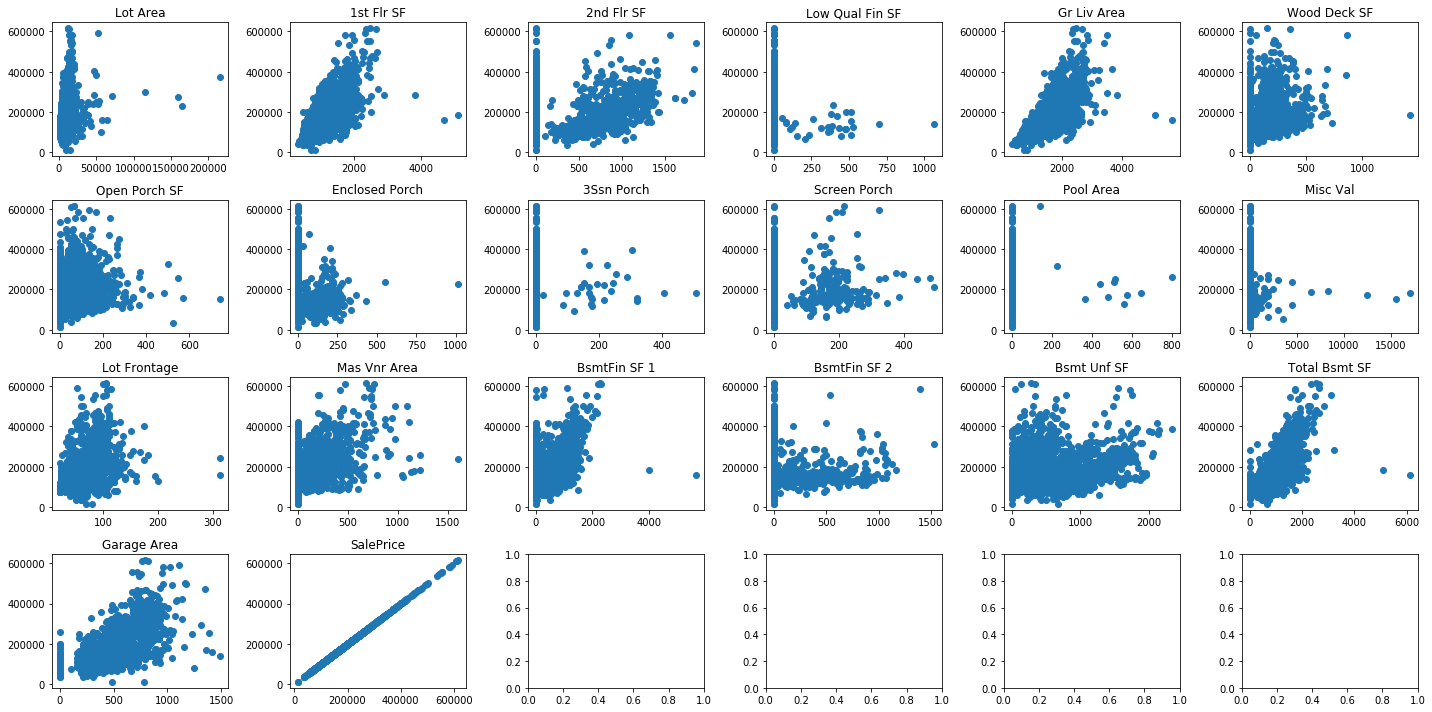

In [8]:
# Plot continous against SalePrice (20 variables)

fig,axes = plt.subplots(nrows=4, ncols=6, figsize =(20,10))

for c, ax in zip (continuous,axes.ravel()):
    ax.scatter(df_new[c], df_new['SalePrice'])
    ax.set_title(c)

plt.tight_layout() # to avoid overlapping with the labels
plt.show()

In [9]:
### OUTLINERS 2 ### 
## manual removal

# Lot Area: remove Lot area > 100'000 & SalePrice > 200'000
df_new.loc[((df_new['Lot Area']>100000)&(df_new['SalePrice']>200000))] # 267, 1513, 2257, 2316
#df_new.drop([267, 1513, 2257, 2316], inplace = True)

# Gr Liv Area: From the documentation, remove Gr Liv Area > 4000 &  SalePrice > 100000
df_new.loc[((df_new['Gr Liv Area']>4000)&(df_new['SalePrice']>100000))] # 71, 1500
df_new.drop([71, 1500], inplace = True)

#Wood Deck SF: remove Wood Deck SF > 1000
df_new.loc[(df_new['Wood Deck SF']>1000)] # 283
df_new.drop([283], inplace= True)

#Lot Frontage: remove Lot Frontage > 300
df_new.loc[(df_new['Lot Frontage']>300)] # 1304
df_new.drop([1304], inplace= True)

In [10]:
df_new.shape

(2418, 80)

### Feature Encoding  & Feature Engineering ###
> Defining a function, this will **get dummies** (one-hot encode ordinal and nominal values) and will take the **log** of the continuous variable (Log1p(x), which will leave zero values untransformed, a necessary conditions given the peak of zeroes for certain columns, like Pool, Fence and Alley). **Missing values** will be filled with column's median and we add a **polynomial features 0.5, 2 and 3** to the continuous variables

In [11]:
#continuous variable less SalePrice
continuous = ['Lot Area', '1st Flr SF', '2nd Flr SF','Low Qual Fin SF', 'Gr Liv Area', 
              'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch','Screen Porch',
              'Pool Area','Misc Val', 'Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
              'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Area']

import numpy as np

# Preprocessing function
def preprocess(df):
    # Work on a copy
    df = df.copy()
    
    # One-hot encoding
    df = pd.get_dummies(df, dummy_na=True)
    
    # Fill missing values
    for c in df.columns:
        df[c] = df[c].fillna(df[c].median())
        
    # Apply log-transform on continuous
    df[continuous] = np.log1p(df[continuous])
    
    # Add polynomial features (2,3,0.5) on continuous
    for c in continuous:
        for d in [0.5,2,3]:
            name ='{}**{}'.format(c,d)
            df[name]=df[c]**d

    return df

preprocessed_df = preprocess(df_new)
preprocessed_df.head() # 5 rows × 402 columns

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,BsmtFin SF 2**3,Bsmt Unf SF**0.5,Bsmt Unf SF**2,Bsmt Unf SF**3,Total Bsmt SF**0.5,Total Bsmt SF**2,Total Bsmt SF**3,Garage Area**0.5,Garage Area**2,Garage Area**3
0,60,4.248495,9.082052,7,5,2000,2000,0.000000,5.707110,0.0,...,0.0,2.545894,42.010842,272.296513,2.619087,47.054317,322.774492,2.513756,39.929358,252.312340
1,20,4.330733,9.227296,6,6,1951,1951,6.259581,0.000000,0.0,...,0.0,2.319461,28.943296,155.711959,2.319461,28.943296,155.711959,2.448257,35.927574,215.348490
2,160,3.091042,7.601902,4,5,1970,1970,4.394449,0.000000,0.0,...,0.0,2.510866,39.746075,250.577093,2.510866,39.746075,250.577093,2.378967,32.029739,181.271738
3,20,4.262680,9.264165,5,5,1959,1959,0.000000,6.926577,0.0,...,0.0,2.437786,35.316864,209.881040,2.691378,52.468480,380.056117,2.470788,37.268500,227.516489
4,190,4.110874,9.222368,7,4,1910,1950,0.000000,0.000000,0.0,...,0.0,2.613594,46.660843,318.734349,2.613594,46.660843,318.734349,2.394440,32.871202,188.461820


### Model fitting & Regularization###
1. Use the **median** as the baseline when we measure absolute distances like with the **MAE** cost function
2. The **simple** model will analyse the total rooms above grade (**TotRmsAbvGrd**) and the above ground living area square feet (**Gr Liv Area**) as independent variables versus Saleprice as dependent variable because I think they are the most correlated with the target
3. The **intermediate** model comprises variables that are the most correlated (visually) with the target variable. Hence, in addition to ones chosen for the simple model, I added, **Lot Area, 1st Floor SF, 2nd Floor SF, Lot Frontage, Total Bsmt SF, Garage Area, Year Remod/Add, Year Built**. And 2 ordinal variables that intuitively would infer on the target variable, i.e. **Overall Qual and Overall Cond**
4. The **complex model** will use all variables to perform the analysis and will apply regularization using the **Ridge regression** model and fine tuning the **alpha**. **Standardizing** our data (using StandarScaler) will improve model's accuracy.

--> For those analyses a **70/30 Train/Test** split ratio will be used (as the mostly used split in the litterature)


In [12]:
# Create X, y
X = preprocessed_df.drop('SalePrice',axis=1).values
y = np.log10(preprocessed_df.SalePrice).values


from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

#rescale data

scaler = StandardScaler()

X_rescaled = scaler.fit_transform(X) # mean = 0 and std = 1

#Train/test split (0.7/0.3)

from sklearn.model_selection import train_test_split

X_tr_rescaled, X_te_rescaled, y_tr, y_te = train_test_split(X_rescaled, y, test_size=0.3, random_state=0)

print('Train:', X_tr_rescaled.shape, y_tr.shape)
print('Test:', X_te_rescaled.shape, y_te.shape)


Train: (1692, 401) (1692,)
Test: (726, 401) (726,)


In [13]:
### Simple model, create variables and standardize

from sklearn.preprocessing import StandardScaler

# Create X, y simple variables
X_s = preprocessed_df[['Gr Liv Area','TotRms AbvGrd']].values
y = np.log10(preprocessed_df.SalePrice).values

#rescale data

scaler = StandardScaler()

X_s_rescaled = scaler.fit_transform(X_s) # mean = 0 and std = 1

#Train/test split (0.7/0.3)
from sklearn.model_selection import train_test_split

X_s_tr_rescaled, X_s_te_rescaled, y_tr, y_te = train_test_split(X_s_rescaled,y, test_size = 0.3, random_state= 0)

print('Train shape: X {} & y {}'.format(X_s_tr_rescaled.shape, y_tr.shape))
print('Test shape: X {} & y {}'.format(X_s_te_rescaled.shape, y_te.shape))


Train shape: X (1692, 2) & y (1692,)
Test shape: X (726, 2) & y (726,)


In [14]:
# REGRESSION Simple model & Baseline

import numpy as np

# Mean absolute error (MAE)
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

# Median BASELINE (rescaled from log to continuous)
mae_baseline = MAE(10**y_te, np.median(10**y_tr))


# Linear regression SIMPLE model
from sklearn.linear_model import LinearRegression

lr_s = LinearRegression()

lr_s.fit(X_s_tr_rescaled, y_tr)
print(lr_s.coef_)

#find prediction y using X_s_tr_rescaled coefficient applied to X_s_te_rescaled (rescaled from log to continuous)
y_pred_lr = lr_s.predict(X_s_te_rescaled)

#Calculate MAE
mae_lr = MAE(10**y_te, 10**y_pred_lr)

print('MAE baseline {} '.format(mae_baseline))
print('MAE Simple model {} '.format(mae_lr))


[ 0.16292426 -0.04691436]
MAE baseline 53491.707988980714 
MAE Simple model 37620.93386194661 


In [15]:
### Intermediate model, create variables and standardize

#variables defined for the model
variable_intermediate = ['Gr Liv Area','TotRms AbvGrd','Overall Cond', 'Overall Qual',
                         'Lot Area', '1st Flr SF', 'Lot Frontage', 'Total Bsmt SF', 'Garage Area', 'Year Remod/Add', 'Year Built']

# Create X, y intermediate variables
X_i = preprocessed_df[variable_intermediate].values
y = np.log10(preprocessed_df.SalePrice).values

#rescale data

scaler = StandardScaler()

X_i_rescaled = scaler.fit_transform(X_i) # mean = 0 and std = 1

#Train/test split (0.7/0.3)
X_i_tr_rescaled, X_i_te_rescaled, y_tr, y_te = train_test_split(X_i_rescaled,y, test_size = 0.3, random_state= 0)

print('Train shape: X {} & y {}'.format(X_i_tr_rescaled.shape, y_tr.shape))
print('Test shape: X {} & y {}'.format(X_i_te_rescaled.shape, y_te.shape))


Train shape: X (1692, 11) & y (1692,)
Test shape: X (726, 11) & y (726,)


In [16]:
# REGRESSION Intermediate
lr_i=LinearRegression()

lr_i.fit(X_i_tr_rescaled, y_tr)
print(lr_i.coef_)

#find prediction y using X_i_tr_rescaled coefficient applied to X_i_te_rescaled (rescaled from log to continuous)
y_pred_lr = lr_i.predict(X_i_te_rescaled)

#Calculate MAE
mae_lr_intermediate = MAE(10**y_te, 10**y_pred_lr)

print('MAE Intermediate model {} '.format(mae_lr_intermediate))

[ 0.05653097 -0.00729815  0.02379241  0.05822691  0.02286582  0.02414469
  0.00242403  0.01342148  0.01131457  0.01011077  0.04727985]
MAE Intermediate model 18706.360504851284 


In [17]:
### Complex model - Tune Ridge regression, create variables and standardize

# Create X, y
X = preprocessed_df.drop('SalePrice',axis=1).values
y = np.log10(preprocessed_df.SalePrice).values

from sklearn.linear_model import Ridge

#rescale data

scaler = StandardScaler()

X_rescaled = scaler.fit_transform(X) # mean = 0 and std = 1

#Train/test split (0.7/0.3)

from sklearn.model_selection import train_test_split

X_tr_rescaled, X_te_rescaled, y_tr, y_te = train_test_split(X_rescaled, y, test_size=0.3, random_state=0)

print('Train:', X_tr_rescaled.shape, y_tr.shape)
print('Test:', X_te_rescaled.shape, y_te.shape)

# Try with a Ridge regression without grid search
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

ridge = Ridge()
ridge.fit(X_tr_rescaled, y_tr)

print('Train MSE: {:.4f}'.format(MSE(y_tr, ridge.predict(X_tr_rescaled))))
print('Test MSE: {:.4f}'.format(MSE(y_te, ridge.predict(X_te_rescaled)))) 

# Try with a ridge regression tuning the ALpha value using grid search

# Variable to store the results
gs_results = []

# Grid search
for alpha in np.logspace(-10, 10, num=100):
    # Create and fit ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr_rescaled, y_tr)
    
    # Save model and its performance on train/test sets
    gs_results.append({
        'alpha': alpha,
        'train_mse': MSE(y_tr, ridge.predict(X_tr_rescaled)),
        'train_mae': MAE(10**y_tr, 10**ridge.predict(X_tr_rescaled)),
        'test_mse': MSE(y_te, ridge.predict(X_te_rescaled)),
        'test_mae': MAE(10**y_te, 10**ridge.predict(X_te_rescaled)),
    })

# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()

#print the optimal value, i.e. the one minimizing test mse
# Get entry with the best test MSE

best_result = gs_results.loc[gs_results.test_mse.idxmin()]

# Print the details
print('Best alpha: {:.1e}'.format(best_result.alpha))
print('Test MSE: {:.4f}'.format(best_result.test_mse))
print('Test MAE: {:,.0f}$'.format(best_result.test_mae))


Train: (1692, 401) (1692,)
Test: (726, 401) (726,)
Train MSE: 0.0015
Test MSE: 0.0036
Best alpha: 2.1e+02
Test MSE: 0.0035
Test MAE: 13,454$


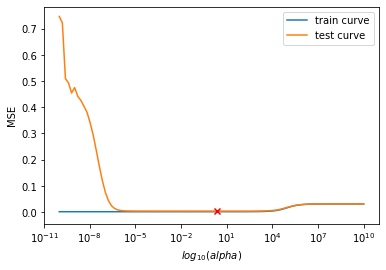

In [18]:
# Plot the validation curves
plt.semilogx(gs_results['alpha'], gs_results['train_mse'], label='train curve')
plt.semilogx(gs_results['alpha'], gs_results['test_mse'], label='test curve')
# Add marker for best score
plt.scatter(np.log10(best_result.alpha), best_result.test_mse, marker='x', c='red', zorder=10)


plt.xlabel('$log_{10}(alpha)$')
plt.ylabel('MSE')
plt.legend()
plt.show()

### Results & Discussion ###
> My simple model has a MAE of USD **37'621** which is almost half of my baseline model (USD **53'491**). Hence the simple model shows an improved performance versus the baseline. The intermediate model shows another improvement as its MAE is USD **18'706**-  a third of the basline model. Finally while considering all variables (complex model), the result shows again an improvement with a MAE at USD **13'454**.

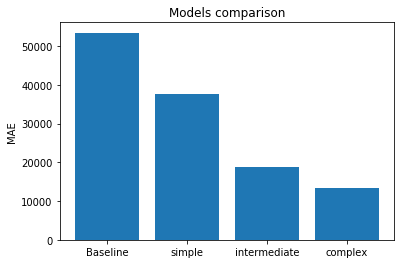

In [19]:
### Vizualization and Final comparison

mae_values = [mae_baseline, mae_lr, mae_lr_intermediate,best_result.test_mae]
titles = ['Baseline', 'simple', 'intermediate', 'complex']

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)
plt.title('Models comparison')

plt.ylabel('MAE')
plt.show()

### Compute predictions ###
> Convert the test file in a Dataframe and apply the preprocessed features
Save the 3 different models into **predictions-simple-model.csv, predictions-intermediate-model.csv** and **predictions-complex-model.csv**

In [20]:
# read the house-prices-test csv file
df_test = pd.read_csv('house-prices-test.csv')
df_pid = df_test['PID']
df_test.shape

# remove columns Order & PID
df_test = df_test.drop(columns = ['Order', 'PID'])


In [21]:
#preprocess the test dataframe

preprocessed_df_test = preprocess(df_test)

preprocessed_df_test.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,BsmtFin SF 2**3,Bsmt Unf SF**0.5,Bsmt Unf SF**2,Bsmt Unf SF**3,Total Bsmt SF**0.5,Total Bsmt SF**2,Total Bsmt SF**3,Garage Area**0.5,Garage Area**2,Garage Area**3
0,50,4.248495,9.330432,6,7,1932,1950,6.175867,5.697093,6.324359,...,252.958651,0.000000,0.000000,0.000000,2.598288,45.577371,307.697457,2.463887,36.853857,223.730097
1,20,4.189655,9.185843,5,7,1994,1994,0.000000,6.628041,0.000000,...,0.000000,2.337484,29.853458,163.114273,2.626540,47.592262,328.325431,2.467599,37.076467,225.760274
2,60,4.465908,9.311633,8,5,2006,2006,6.670766,0.000000,0.000000,...,0.000000,2.643909,48.863686,341.569698,2.643909,48.863686,341.569698,2.573984,43.895824,290.827058
3,20,4.262680,8.853808,5,7,1960,2002,3.828641,6.378426,0.000000,...,0.000000,2.459141,36.570710,221.156696,2.630341,47.868344,331.186480,2.353989,30.705602,170.147831
4,50,4.204693,9.072571,4,7,1900,1950,0.000000,0.000000,0.000000,...,0.000000,2.599410,45.656135,308.495419,2.599410,45.656135,308.495419,2.439927,35.441106,210.989529


In [22]:
### Prediction with simple model

# Define X_test_s

X_test_s = preprocessed_df_test[['Gr Liv Area','TotRms AbvGrd']].values

# rescale data

scaler = StandardScaler()

X_test_s_rescaled = scaler.fit_transform(X_test_s) # mean = 0 and std = 1

# predict y

y_test_s_pred = lr_s.predict(X_test_s_rescaled)

# save prediction
df_pred_s= pd.DataFrame(np.around(10**y_test_s_pred,0), columns=['SalePrice'])
df_pred_simple_model = pd.concat([df_pid, df_pred_s], axis=1)

df_pred_simple_model.to_csv('predictions-simple-model.csv')

In [23]:
### Prediction with intermediate model

#variables defined for the model
variable_intermediate = ['Gr Liv Area','TotRms AbvGrd','Overall Cond', 'Overall Qual',
                         'Lot Area', '1st Flr SF', 'Lot Frontage', 'Total Bsmt SF', 'Garage Area',
                         'Year Remod/Add', 'Year Built']

X_test_i = preprocessed_df_test[variable_intermediate].values

# rescale data

scaler = StandardScaler()

X_test_i_rescaled = scaler.fit_transform(X_test_i) # mean = 0 and std = 1

# predict y

y_test_i_pred = lr_i.predict(X_test_i_rescaled)

# save prediction
df_pred_i= pd.DataFrame(np.around(10**y_test_i_pred,0), columns=['SalePrice'])
df_pred_intermediate_model = pd.concat([df_pid, df_pred_i], axis=1)

df_pred_intermediate_model.to_csv('predictions-intermediate-model.csv')

In [24]:
### Prediction with complex model

#adding a zero dataframe to fit the shape
zero_data= pd.DataFrame(np.zeros((500,41)))
preprocessed_df_test_mod = pd.concat([preprocessed_df_test,zero_data], axis=1)

X_test_c = preprocessed_df_test_mod.values

# rescale data

scaler = StandardScaler()

X_test_c_rescaled = scaler.fit_transform(X_test_c) # mean = 0 and std = 1

# predict y with ridge and best alpha

y_test_c_pred = ridge.predict(X_test_c_rescaled)

# save prediction
df_pred_c= pd.DataFrame(np.around(10**y_test_c_pred,0), columns=['SalePrice'])
df_pred_complex_model = pd.concat([df_pid, df_pred_c], axis=1)

df_pred_complex_model.to_csv('predictions-complex-model.csv')